In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from datetime import datetime

In [3]:
# constants
v_0 = -5.0
R = 15.0
M = 1000

x = np.linspace(-R, R, M+1)
delta = x[1] - x[0]

# matrix
diag = 2/delta**2+v_0*np.exp(-x[1:-1]**2)
subdiag = -1/delta**2 * np.ones(M-2)

diags = [subdiag, diag, subdiag]

H = scipy.sparse.diags(diags,[-1,0,1]).toarray()

In [4]:
e = scipy.linalg.eigvalsh_tridiagonal(diag, subdiag, select='v', select_range=(v_0,0.0))
print(e)

[-3.14048429 -0.40635647]


In [5]:
e_max = np.max(scipy.linalg.eigvalsh_tridiagonal(diag, subdiag*np.ones(M-2)))
e_max

4444.395414961617

In [6]:
np.max(np.real(scipy.linalg.eigvals(H)))

4444.395414961624

In [7]:
H_ = H - e_max/2.0 * scipy.sparse.identity(M-1).toarray()

np.min(np.real(scipy.linalg.eigvals(H_))) + e_max/2.0

-3.140484287037907

In [15]:
phi_1 = np.exp(-x[1:-1]**2) / scipy.linalg.norm(np.exp(-x[1:-1]**2))

num_iter = 1000

for i in range(num_iter):
    phi_2 = H @ phi_1
    
#     l = np.dot(phi_2, phi_1)
    
#     print(i, l + e_max/2.0)
    
    phi_1 = phi_2 / scipy.linalg.norm(phi_2)
    
e_max = np.dot(phi_2, phi_1)

H_ = H - e_max/2.0 * scipy.sparse.identity(M-1).toarray()

phi_1 = np.exp(-x[1:-1]**2) / scipy.linalg.norm(np.exp(-x[1:-1]**2))

num_iter = 1001

for i in range(num_iter):
    phi_2 = H_ @ phi_1
    
#     l = np.dot(phi_2, phi_1)
    
#     print(i, l + e_max/2.0)
    
    phi_1 = phi_2 / scipy.linalg.norm(phi_2)
    
-np.dot(phi_2, phi_1) + e_max/2.0, e_max

(-3.1392174820598484, 4441.4289634666)

In [24]:
def iter_m(num_iter, A, x):
    
    phi_1 = np.exp(-x[1:-1]**2) / scipy.linalg.norm(np.exp(-x[1:-1]**2))
    
    for i in range(num_iter):
        phi_2 = A @ phi_1    
        phi_1 = phi_2 / scipy.linalg.norm(phi_2)
    
    return abs(np.dot(phi_2, phi_1)), phi_1

def iter_method_time(v_0, R, M):
    start_time = datetime.now()
    
    x = np.linspace(-R, R, M+1)
    delta = x[1] - x[0]
    
    # matrix
    diag = 2/delta**2+v_0*np.exp(-x[1:-1]**2)
    subdiag = -1/delta**2 * np.ones(M-2)

    diags = [subdiag, diag, subdiag]

    H = scipy.sparse.diags(diags,[-1,0,1]).toarray()
    
    e_max, _ = iter_m(1000, H, x)
    
    H_ = H - e_max/2.0 * scipy.sparse.identity(M-1).toarray()
    
    e_min, phi = iter_m(1000, H_, x)
    
    e_1 = -e_min + e_max/2.0
    
    residual = scipy.linalg.norm(H @ phi - e_1 * phi)

    return (datetime.now() - start_time), e_1, residual


In [39]:
N = 30
mm = np.arange(1,N+1)*100
t = [None] * N
e_1 = np.zeros(N)
residual = np.zeros(N)

for i in range(N):
    t[i], e_1[i], residual[i] = iter_method_time(-5.0, 6.0, mm[i]) 
    print(i, iter_method_time(-5.0, 6.0, mm[i]))

0 (datetime.timedelta(microseconds=146496), -3.142745894258695, 4.948562631895013e-12)
1 (datetime.timedelta(microseconds=99721), -3.140935486677108, 0.0004919801724043624)
2 (datetime.timedelta(microseconds=156661), -3.1405130433249724, 0.018065975513275385)
3 (datetime.timedelta(microseconds=180330), -3.1392125651891547, 0.07065402766537351)
4 (datetime.timedelta(microseconds=232336), -3.135765686628929, 0.13818878044923605)
5 (datetime.timedelta(microseconds=415759), -3.130721669902414, 0.20200039707163248)
6 (datetime.timedelta(microseconds=564465), -3.1251363200426567, 0.2562594106535799)
7 (datetime.timedelta(seconds=1, microseconds=135750), -3.119811082666274, 0.30006370249870423)
8 (datetime.timedelta(seconds=1, microseconds=325335), -3.115033075107931, 0.33536023865716735)
9 (datetime.timedelta(seconds=1, microseconds=277484), -3.1109121380141005, 0.3637214220266797)
10 (datetime.timedelta(seconds=1, microseconds=522650), -3.1073797518874926, 0.3869119955688701)
11 (datetime.t

In [40]:
tt = [t_.seconds+t_.microseconds*1e-6 for t_ in t]

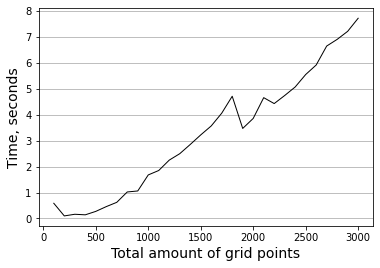

In [41]:
plt.plot(mm, tt, linewidth=1.0, color='black')
plt.xlabel('Total amount of grid points', fontsize=14)
plt.ylabel('Time, seconds', fontsize=14)
plt.grid(axis='y')

# plt.ylim(0,100)

plt.savefig('figures/t_vs_m.png')

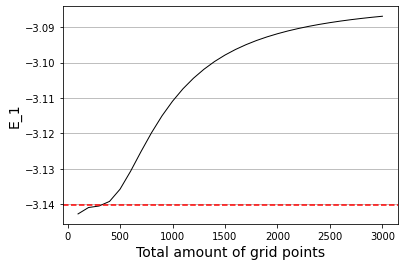

In [42]:
plt.plot(mm, e_1, linewidth=1.0, color='black')
plt.axhline(y=-3.140334020243438, color='red', linestyle='--')
plt.xlabel('Total amount of grid points', fontsize=14)
plt.ylabel('E_1', fontsize=14)
plt.grid(axis='y')

# plt.ylim(0,100)

plt.savefig('figures/e1_vs_m.png')

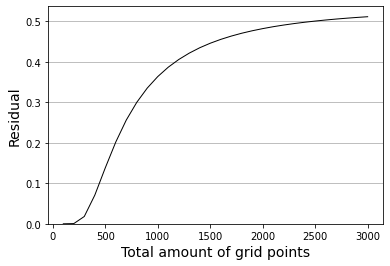

In [44]:
plt.plot(mm, residual, linewidth=1.0, color='black')
plt.xlabel('Total amount of grid points', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.grid(axis='y')

plt.ylim(0,None)

plt.savefig('figures/r_vs_m.png')